In [ ]:
!pip install sklearn

In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
iris = datasets.load_iris()
iris.data.size


600

In [3]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [4]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [5]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [6]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [7]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


# Custom Dataset using SVM

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [30]:
train_dir = "./Data/train/"
test_dir = "./Data/test/"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(224,224),
                                                batch_size=32,
                                                class_mode = "categorical")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(224,224),
                                                batch_size=32,
                                                class_mode = "categorical")

Found 5201 images belonging to 5 classes.
Found 1330 images belonging to 5 classes.


In [31]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(5,kernel_regularizer=l2(0.001),activation = "softmax"))

In [32]:
model.compile(optimizer = 'adam', loss = "squared_hinge", metrics = ['accuracy'])

In [33]:
history = model.fit(x = training_set, validation_data = test_set, epochs=5, steps_per_epoch=10,)

Epoch 1/5
10/10 [==============================] - 192s 21s/step - loss: 1.2871 - accuracy: 0.2937 - val_loss: 1.3032 - val_accuracy: 0.2414
Epoch 2/5
10/10 [==============================] - 196s 21s/step - loss: 1.2494 - accuracy: 0.3906 - val_loss: 1.2715 - val_accuracy: 0.1692
Epoch 3/5
10/10 [==============================] - 246s 27s/step - loss: 1.2192 - accuracy: 0.4156 - val_loss: 1.2427 - val_accuracy: 0.4053
Epoch 4/5
10/10 [==============================] - 221s 24s/step - loss: 1.1905 - accuracy: 0.4688 - val_loss: 1.2730 - val_accuracy: 0.2654
Epoch 5/5
10/10 [==============================] - 250s 27s/step - loss: 1.1595 - accuracy: 0.4969 - val_loss: 1.4066 - val_accuracy: 0.1639


In [39]:
from tensorflow.keras.models import load_model

model.save('model_SVM.h5')

C:\Users\yashm\anaconda3\envs\tfod\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


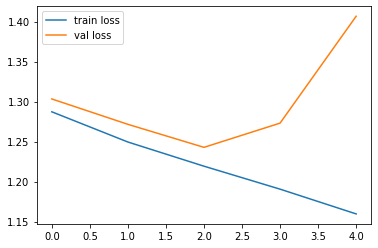

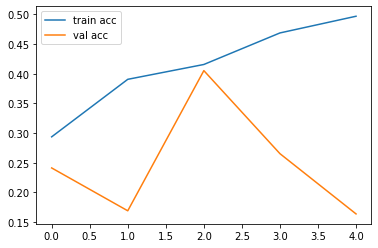

In [40]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image

In [42]:
model=load_model('model_resnet50.h5')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

imagePath = "./Data/train/Rose/IMG20211108070232_BURST000_COVER.jpg"
test_image = image.load_img(imagePath, target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)

In [43]:
result

array([[8.1593627e-03, 6.0513435e-06, 1.6461328e-10, 3.8817579e-05,
        9.9179584e-01]], dtype=float32)